In [1]:
import pandas as pd
import re
import string
from bs4 import BeautifulSoup
import nltk
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import spacyimport pandas as pd
import re
import string
from bs4 import BeautifulSoup
import nltk
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import spacy

In [2]:
data = pd.read_csv("reports_data.csv",index_col=0)
data

,Report_Title,Report_Content
0,Arcade.xyz →,Arcade.xyz Findings & Analysis Report2023-10-...
1,Livepeer →,Livepeer Onchain Treasury Upgrade Findings & ...
2,Ondo Finance →,Ondo Finance Findings & Analysis Report2023-1...
3,Centrifuge →,Centrifuge Findings & Analysis Report2023-10-...
4,Canto →,veRWA Findings & Analysis Report2023-10-11Tab...
...,...,...
237,Marginswap →,Marginswap Findings & Analysis Report2021-05-...
238,ElasticDAO →,ElasticDAO Findings & Analysis Report2021-03-...
239,Slingshot Finance →,Slingshot Finance Findings & Analysis Report2...
240,Nested Finance →,Nested Finance contest Findings & Analysis Re...


In [3]:
def clean_html(html):

    # parse html content
    soup = BeautifulSoup(html, "html.parser")

    for data in soup(['style', 'script', 'code', 'a']):
        # Remove tags
        data.decompose()

    # return data by retrieving the tag content
    return ' '.join(soup.stripped_strings)

In [4]:
# Load spacy
nlp = spacy.load('en_core_web_sm')

def clean_string(text, stem="None"):

    final_string = ""

    # Make lower
    text = text.lower()

    # Remove line breaks
    text = re.sub(r'\n', '', text)

    # Remove puncuation
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)

    # Remove stop words
    text = text.split()
    useless_words = nltk.corpus.stopwords.words("english")
    useless_words = useless_words + ['hi', 'im']

    text_filtered = [word for word in text if not word in useless_words]

    # Remove numbers
    text_filtered = [re.sub(r'\w*\d\w*', '', w) for w in text_filtered]

    # Stem or Lemmatize
    if stem == 'Stem':
        stemmer = PorterStemmer() 
        text_stemmed = [stemmer.stem(y) for y in text_filtered]
    elif stem == 'Lem':
        lem = WordNetLemmatizer()
        text_stemmed = [lem.lemmatize(y) for y in text_filtered]
    elif stem == 'Spacy':
        text_filtered = nlp(' '.join(text_filtered))
        text_stemmed = [y.lemma_ for y in text_filtered]
    else:
        text_stemmed = text_filtered

    final_string = ' '.join(text_stemmed)

    return final_string

In [5]:
data['Report_Content'] = data['Report_Content'].apply(lambda x: clean_html(x))

In [6]:
data['Report_Content_Clean'] = data['Report_Content'].apply(lambda x: clean_string(x, stem='Stem'))

In [7]:
data

,Report_Title,Report_Content,Report_Content_Clean
0,Arcade.xyz →,Arcade.xyz Findings & Analysis Report2023-10-...,arcadexyz find analysi contentsoverviewabout ...
1,Livepeer →,Livepeer Onchain Treasury Upgrade Findings & ...,livep onchain treasuri upgrad find analysi co...
2,Ondo Finance →,Ondo Finance Findings & Analysis Report2023-1...,ondo financ find analysi contentsoverviewabou...
3,Centrifuge →,Centrifuge Findings & Analysis Report2023-10-...,centrifug find analysi contentsoverviewabout ...
4,Canto →,veRWA Findings & Analysis Report2023-10-11Tab...,verwa find analysi contentsoverviewabout cri...
...,...,...,...
237,Marginswap →,Marginswap Findings & Analysis Report2021-05-...,marginswap find analysi contentsoverviewabout...
238,ElasticDAO →,ElasticDAO Findings & Analysis Report2021-03-...,elasticdao find analysi contentspdf reporttop
239,Slingshot Finance →,Slingshot Finance Findings & Analysis Report2...,slingshot financ find analysi contentspdf rep...
240,Nested Finance →,Nested Finance contest Findings & Analysis Re...,nest financ contest find analysi contentsover...


## Preprocessing

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
vectorizer = TfidfVectorizer(max_df=0.95,min_df=2, stop_words='english')

In [10]:
dtm = vectorizer.fit_transform(data['Report_Content_Clean'])

In [11]:
dtm

<242x15179 sparse matrix of type '<class 'numpy.float64'>'
	with 188612 stored elements in Compressed Sparse Row format>

## Non-Negative Matrix Factorization

In [12]:
from sklearn.decomposition import NMF


In [13]:
nfm_model = NMF(n_components=20,random_state=42)

In [14]:
nfm_model.fit(dtm)

C:\Users\macov\anaconda3\envs\lab\Lib\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


NMF(n_components=20, random_state=42)

In [15]:
for index, topic in enumerate(nfm_model.components_):
    print(f"The top 15 words for topic #{index}")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-15:]])
    print("\n")


The top 15 words for topic #0
['sload', 'uncheck', 'emit', 'variabl', 'string', 'intern', 'storag', 'calldata', 'oper', 'owner', 'save', 'data', 'public', 'byte', 'memori']


The top 15 words for topic #1
['protocol', 'robe', 'optim', 'fund', 'drave', 'variabl', 'cmichel', 'eth', 'transfer', 'unnecessari', 'defsec', 'save', 'contest', 'watchpug', 'submit']


The top 15 words for topic #2
['protocol', 'oracl', 'deposit', 'upperbound', 'market', 'public', 'credit', 'wild', 'price', 'accru', 'posit', 'borrow', 'collater', 'liquid', 'debt']


The top 15 words for topic #3
['order', 'buyer', 'foundat', 'price', 'collect', 'recipi', 'seller', 'transfer', 'fee', 'creator', 'buy', 'tokenid', 'royalti', 'sale', 'nft']


The top 15 words for topic #4
['memori', 'voter', 'gaug', 'vetoer', 'treasuri', 'tokenid', 'lock', 'parti', 'checkpoint', 'weight', 'noun', 'power', 'deleg', 'propos', 'vote']


The top 15 words for topic #5
['owner', 'sandclock', 'nftx', 'calli', 'vaultid', 'ether', 'fee', 'buy

In [17]:
# Iterate over all the words considered important in each topic
for index, topic in enumerate(nfm_model.components_):
    print(f"Topic #{index}:")
    important_words = []
    for i in topic.argsort()[-15:]:
        word = vectorizer.get_feature_names_out()[i]
        importance = topic[i]
        important_words.append((word, importance))
    important_words.sort(key=lambda x: x[1], reverse=True)  # Sort words by importance
    print("Important Words:")
    for word, importance in important_words:
        print(f"{word}: {importance}")
    print()

Topic #0:
Important Words:
memori: 0.8883636530917527
byte: 0.6219964348155708
public: 0.43966340305700136
data: 0.387900890810482
save: 0.37513940355002523
owner: 0.36131192691464176
oper: 0.3407400810865886
calldata: 0.33277588234770455
storag: 0.3255551714891908
intern: 0.32455542585739744
string: 0.31018452935669283
variabl: 0.30046315302646653
emit: 0.28272948534853304
uncheck: 0.27952031412846823
sload: 0.27603068406615433

Topic #1:
Important Words:
submit: 1.3590052898320837
watchpug: 0.25864200297867274
contest: 0.1805407143313224
save: 0.16034614277531944
defsec: 0.1399943668817534
unnecessari: 0.13052999174622856
transfer: 0.12403946656833362
eth: 0.10798046038729144
cmichel: 0.10434669423092789
variabl: 0.09719889098884825
drave: 0.0947754845957122
fund: 0.09108320909884912
optim: 0.09085984594607167
robe: 0.0896089547793782
protocol: 0.08631010788816869

Topic #2:
Important Words:
debt: 0.7818588110125864
liquid: 0.6937847514737001
collater: 0.6735214434116413
borrow: 0.36

C:\Users\macov\anaconda3\envs\lab\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\macov\anaconda3\envs\lab\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\macov\anaconda3\envs\lab\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\macov\anaconda3\envs\lab\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak

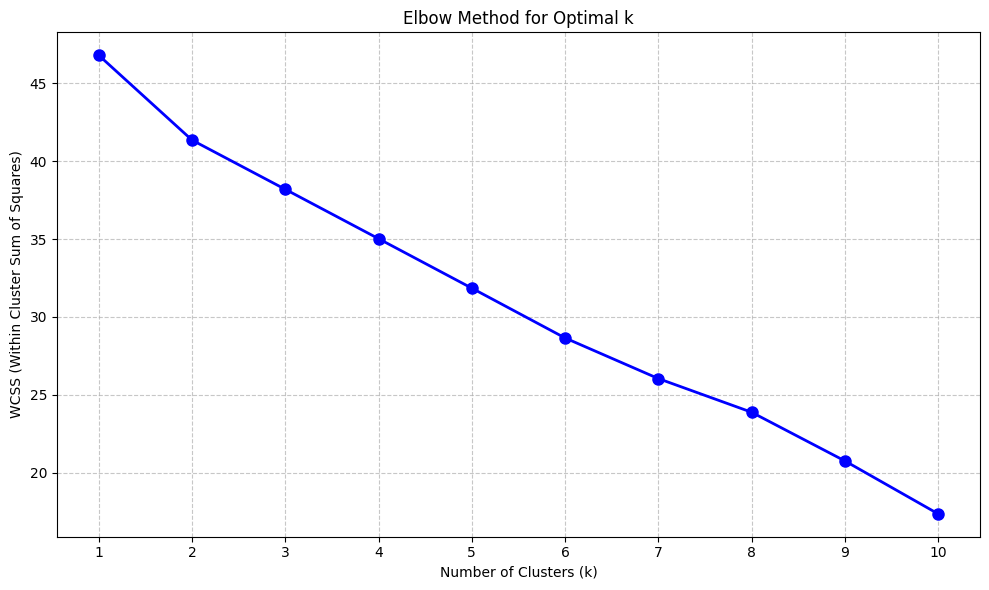

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Calculate WCSS for different values of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(nfm_model.components_)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b', linewidth=2, markersize=8)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within Cluster Sum of Squares)')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig("elbow_method.png", dpi=300)  # Save as PNG with higher resolution
plt.show()

In [29]:
from sklearn.cluster import KMeans

# Number of clusters 
num_clusters = 3  

# Cluster topics using K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
topic_clusters = kmeans.fit_predict(nfm_model.components_)

# Define labels for each cluster 
cluster_labels = {
    0: "Human Detection",
    1: "Machine Detection",
    2: "Unknown"  
}

# Assign labels to topics based on cluster assignments
topic_labels = [cluster_labels[cluster] for cluster in topic_clusters]

# Print topic labels
for index, label in enumerate(topic_labels):
    print(f"Topic #{index}: {label}")


C:\Users\macov\anaconda3\envs\lab\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\macov\anaconda3\envs\lab\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Topic #0: Human Detection
Topic #1: Machine Detection
Topic #2: Machine Detection
Topic #3: Machine Detection
Topic #4: Machine Detection
Topic #5: Machine Detection
Topic #6: Unknown
Topic #7: Machine Detection
Topic #8: Machine Detection
Topic #9: Machine Detection
Topic #10: Machine Detection
Topic #11: Machine Detection
Topic #12: Machine Detection
Topic #13: Machine Detection
Topic #14: Machine Detection
Topic #15: Machine Detection
Topic #16: Machine Detection
Topic #17: Machine Detection
Topic #18: Machine Detection
Topic #19: Machine Detection


C:\Users\macov\anaconda3\envs\lab\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\macov\anaconda3\envs\lab\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Human Detection: 5.00%
Machine Detection: 90.00%
Unknown: 5.00%


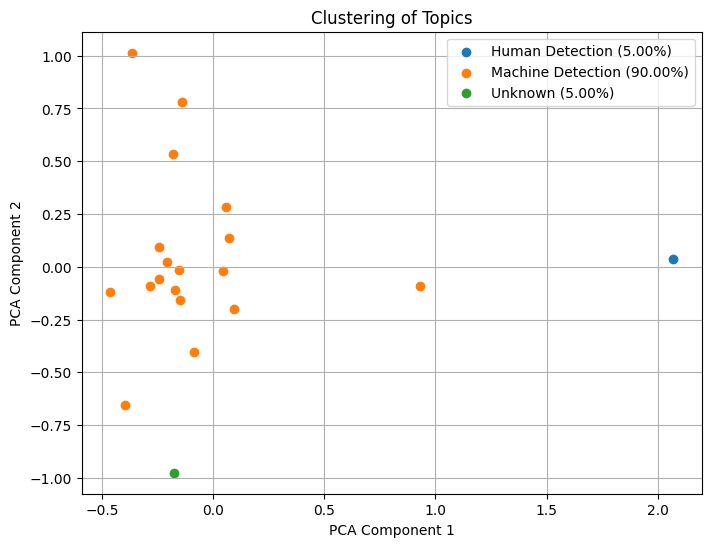

In [37]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Update the number of clusters
num_clusters = 3

# Update the clustering algorithm with the new number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
topic_clusters = kmeans.fit_predict(nfm_model.components_)

# Update the cluster labels
cluster_labels = {
    0: "Human Detection",
    1: "Machine Detection",
    2: "Unknown"
}

# Count occurrences of each cluster
cluster_counts = {label: sum(topic_clusters == label) for label in range(num_clusters)}

# Get the total number of topics
total_topics = len(topic_clusters)

# Calculate the percentage of each cluster
cluster_percentages = {cluster_labels[label]: count / total_topics * 100 for label, count in cluster_counts.items()}

# Print cluster percentages
for label, percentage in cluster_percentages.items():
    print(f"{label}: {percentage:.2f}%")

# Reduce dimensionality of topic representations using PCA
pca = PCA(n_components=2)
topic_embeddings_2d = pca.fit_transform(nfm_model.components_)

# Plot the clustered topics
plt.figure(figsize=(8, 6))
for cluster_label in range(num_clusters):
    cluster_mask = (topic_clusters == cluster_label)
    plt.scatter(topic_embeddings_2d[cluster_mask, 0], topic_embeddings_2d[cluster_mask, 1], label=f"{cluster_labels[cluster_label]} ({cluster_percentages[cluster_labels[cluster_label]]:.2f}%)")

plt.title('Clustering of Topics')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.savefig("clustered_topics.png", dpi=300)  # Save as PNG with higher resolution
plt.show()

